# FOOOF Internals

<div class="alert alert-success">
This notebook takes a step by step approach, with the code, on how the FOOOF fitting algorithm works.             <br>Note that this notebook is for demonstrative purposes, and does not represent recommended usage of the fooof module.
</div>

<div class="alert alert-info">
To get an introduction to the codebase, go back [here](02-FOOOF.ipynb), or to skip ahead to more code examples, go ahead to [here](03-FOOOFGroup.ipynb).
</div>

In [39]:
%matplotlib inline

import numpy as np

from fooof import FOOOF
#from fooof.plts.templates import plot_psd

In [25]:
# Load example data
freqs = np.load('dat/freqs.npy')
psd = np.load('dat/psd.npy')

In [31]:
# Initialize FOOOF object
fm = FOOOF(bandwidth_limits=[1, 8])

Note that data can be added to FOOF independent of fitting the model, and can then plot input data.

In [42]:
# Add data to FOOOF object
fm.add_data(freqs, psd, [3, 40])

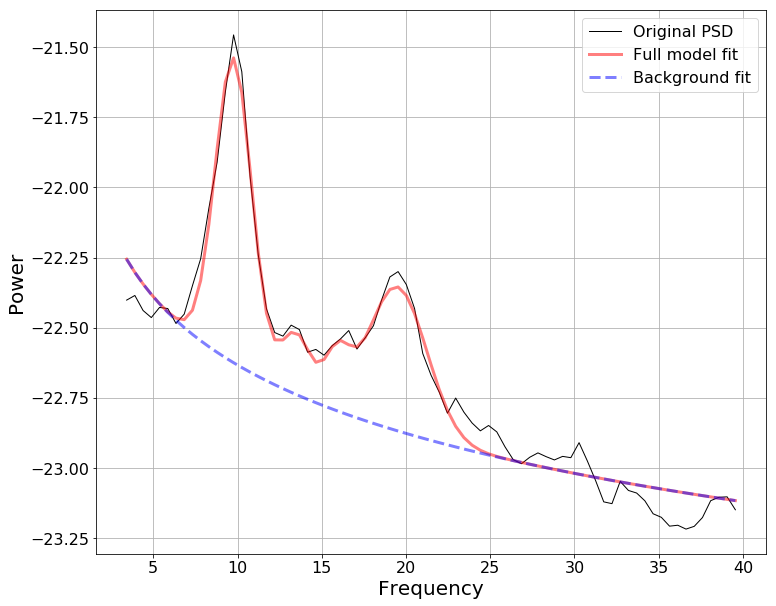

In [43]:
# We start with a raw power-spectrum
fm.plot()

In [44]:
# Fit the FOOOF model.
#  Note: the intermediate steps are largely stored and available (privately) inside the model
#  For this notebook, we will fit the model, as normal, and then plot each intermediate step
fm.fit(freqs, psd, [3, 40])

In [45]:
# Initial background fit (this recreates an initial fit that isn't ultimately stored in the FOOOF object)
init_bg_fit = fm._create_bg_fit(fm.freqs, fm._clean_background_fit(fm.freqs, fm.psd))

# Plot the initial background fit
# plot_psd(fm.freqs, init_bg_fit)

In [46]:
# Flatten the PSD, by subtracting out the initial background fit
# plot_psd(fm.freqs, fm._psd_flat)

In [47]:
# Find oscillations in flattened spectrum
# plot_psd(fm.freqs, fm._psd_flat)
# TODO: plot amplitude threshold
# TODO: plot 

# Note: iterative nature

In [48]:
# Fit gaussians to candidate oscillations, and create oscillation fit
# plot_psd(fm.freqs, fm._oscillation_fit)

In [49]:
# Create oscillation removed PSD (by removing oscillation fit from original PSD)
# plot_psd(fm.freqs, fm._psd_osc_rm)

In [50]:
# Fit the final background fit on the oscillation removed PSD
# plot_psd(fm.freqs, fm._psd_osc_rm)
# plot_psd(fm.freqs, fm._background_fit)

In [51]:
# Recreate the full PSD model, by combining the oscillation & background fits
# plot_psd(fm.freqs, fm.psd_fit_)

In [52]:
# The last stage is to calculate the fit error, R^2, and update gaussian parameters -> oscillations parameters
#  These results are part of what are stored, and printed, as the model results
fm.print_results()


                                          FOOOF - PSD MODEL                                         

                    The input PSD was modelled in the frequency range: 3 - 40 Hz                    
                                  Frequency Resolution is 0.49 Hz                                   

                              Background Parameters (offset, slope):                                
                                          -21.8243, 0.8088                                          

                                     4 oscillations were found:                                     
                                 CF:   9.76, Amp:  1.086, BW:  2.16                                 
                                 CF:  13.47, Amp:  0.217, BW:  1.74                                 
                                 CF:  15.92, Amp:  0.255, BW:  1.53                                 
                                 CF:  19.51, Amp:  0.513, BW:  3.49                    

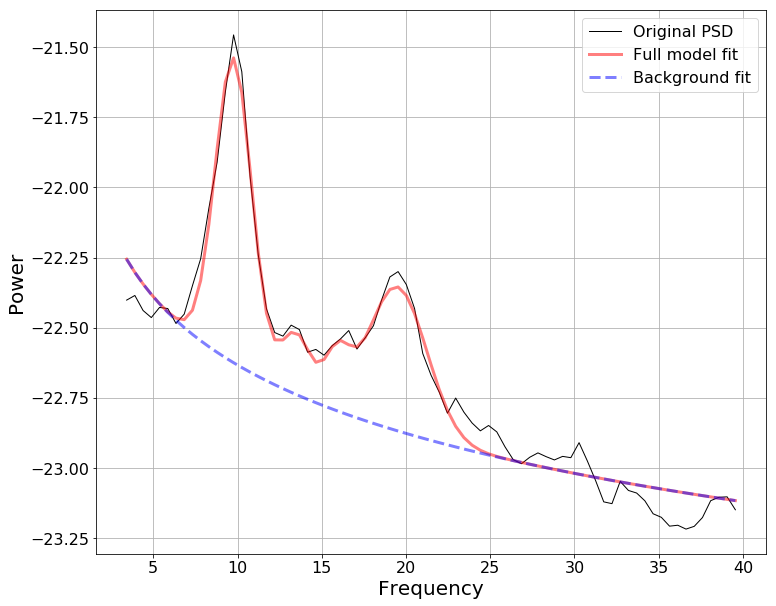

In [53]:
# This final fit, and second background fit, both plotted above, are the same as what are plotted by FOOOF
fm.plot()